In [1]:
pip install Lifetimes


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
 
# identify name of xlsx file (which will change when uploaded)
xlsx_filename = "Online Retail.xlsx"
 
# schema of the excel spreadsheet data range
orders_schema = {
  'InvoiceNo':str,
  'StockCode':str,
  'Description':str,
  'Quantity':np.int64,
  'InvoiceDate':np.datetime64,
  'UnitPrice':np.float64,
  'CustomerID':str,
  'Country':str  
  }
 
# read spreadsheet to pandas dataframe
# the xlrd library must be installed for this step to work 
orders_pd = pd.read_excel(
  xlsx_filename, 
  sheet_name='Online Retail',
  header=0, # first row is header
  dtype=orders_schema
  )
 
# display first few rows from the dataset
orders_pd.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [3]:
import lifetimes
 
# set the last transaction date as the end point for this historical dataset
current_date = orders_pd['InvoiceDate'].max()
 
# calculate the required customer metrics
metrics_pd = (
  lifetimes.utils.summary_data_from_transaction_data(
    orders_pd,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date, 
    freq='D'
    )
  )
 
# display first few rows
metrics_pd.head(10)

,frequency,recency,T
CustomerID,,,
12346,0.0,0.0,325.0
12347,6.0,365.0,367.0
12348,3.0,283.0,358.0
12349,0.0,0.0,18.0
12350,0.0,0.0,310.0
12352,6.0,260.0,296.0
12353,0.0,0.0,204.0
12354,0.0,0.0,232.0
12355,0.0,0.0,214.0


In [4]:
metrics_pd.describe()

,frequency,recency,T
count,4372.000000,4372.000000,4372.000000
mean,3.413541,133.723010,225.304209
std,6.674343,133.000474,118.384168
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,115.000000
50%,1.000000,98.000000,253.000000
75%,4.000000,256.000000,331.000000
max,145.000000,373.000000,373.000000


In [5]:
# define a notebook parameter making holdout days configurable (90-days default)
# dbutils.widgets.text('holdout days', '90')

from datetime import timedelta
 
# set the last transaction date as the end point for this historical dataset
current_date = orders_pd['InvoiceDate'].max()
 
# define end of calibration period
holdout_days = 90
calibration_end_date = current_date - timedelta(days = holdout_days)
 
# calculate the required customer metrics
metrics_cal_pd = (
  lifetimes.utils.calibration_and_holdout_data(
    orders_pd,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date,
    calibration_period_end=calibration_end_date,
    freq='D'    
    )
  )
 
# display first few rows
metrics_cal_pd.head(10)

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346,0.0,0.0,235.0,0.0,90.0
12347,4.0,238.0,277.0,2.0,90.0
12348,2.0,110.0,268.0,1.0,90.0
12350,0.0,0.0,220.0,0.0,90.0
12352,3.0,34.0,206.0,3.0,90.0
12353,0.0,0.0,114.0,0.0,90.0
12354,0.0,0.0,142.0,0.0,90.0
12355,0.0,0.0,124.0,0.0,90.0
12356,1.0,80.0,235.0,1.0,90.0


In [6]:
metrics_cal_pd

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346,0.0,0.0,235.0,0.0,90.0
12347,4.0,238.0,277.0,2.0,90.0
12348,2.0,110.0,268.0,1.0,90.0
12350,0.0,0.0,220.0,0.0,90.0
12352,3.0,34.0,206.0,3.0,90.0
...,...,...,...,...,...
18280,0.0,0.0,187.0,0.0,90.0
18281,0.0,0.0,90.0,0.0,90.0
18282,1.0,4.0,36.0,1.0,90.0


In [7]:
# calculate sales amount as quantity * unit price
orders_pd['SalesAmount'] = orders_pd['Quantity'] * orders_pd['UnitPrice']
 
orders_pd.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [8]:
import lifetimes
 
# set the last transaction date as the end point for this historical dataset
current_date = orders_pd['InvoiceDate'].max()
 
# calculate the required customer metrics
metrics_pd = (
  lifetimes.utils.summary_data_from_transaction_data(
    orders_pd,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date, 
    freq='D',
    monetary_value_col='SalesAmount'  # use sales amount to determine monetary value
    )
  )
 
# display first few rows
metrics_pd.head(10)

,frequency,recency,T,monetary_value
CustomerID,,,,
12346,0.0,0.0,325.0,0.000000
12347,6.0,365.0,367.0,599.701667
12348,3.0,283.0,358.0,301.480000
12349,0.0,0.0,18.0,0.000000
12350,0.0,0.0,310.0,0.000000
12352,6.0,260.0,296.0,208.151667
12353,0.0,0.0,204.0,0.000000
12354,0.0,0.0,232.0,0.000000
12355,0.0,0.0,214.0,0.000000


In [9]:
metrics_pd.describe()

,frequency,recency,T,monetary_value
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,3.413541,133.723010,225.304209,213.254316
std,6.674343,133.000474,118.384168,372.810217
min,0.000000,0.000000,0.000000,-3528.340000
25%,0.000000,0.000000,115.000000,0.000000
50%,1.000000,98.000000,253.000000,148.955000
75%,4.000000,256.000000,331.000000,304.942500
max,145.000000,373.000000,373.000000,8866.081538


In [11]:
from datetime import timedelta
 
# set the last transaction date as the end point for this historical dataset
current_date = orders_pd['InvoiceDate'].max()
 
# define end of calibration period
holdout_days = 90
calibration_end_date = current_date - timedelta(days = holdout_days)
 
# calculate the required customer metrics
metrics_cal_pd = (
  lifetimes.utils.calibration_and_holdout_data(
    orders_pd,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date,
    calibration_period_end=calibration_end_date,
    freq='D',
    monetary_value_col='SalesAmount'  # use sales amount to determine monetary value
    )
  )
 
# display first few rows
metrics_cal_pd.head(10)

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
CustomerID,,,,,,,
12346,0.0,0.0,235.0,0.0000,0.0,0.000000,90.0
12347,4.0,238.0,277.0,519.7675,2.0,26.192069,90.0
12348,2.0,110.0,268.0,297.2200,1.0,103.333333,90.0
12350,0.0,0.0,220.0,0.0000,0.0,0.000000,90.0
12352,3.0,34.0,206.0,101.5600,3.0,20.090000,90.0
12353,0.0,0.0,114.0,0.0000,0.0,0.000000,90.0
12354,0.0,0.0,142.0,0.0000,0.0,0.000000,90.0
12355,0.0,0.0,124.0,0.0000,0.0,0.000000,90.0
12356,1.0,80.0,235.0,481.4600,1.0,29.175000,90.0


In [12]:
metrics_cal_pd.describe()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.0
mean,2.677608,90.587046,185.041618,190.242725,1.502345,17.999563,90.0
std,5.222838,96.077761,80.771943,362.064653,2.495318,77.381388,0.0
min,0.000000,0.000000,1.000000,-1462.500000,0.000000,-114.000000,90.0
25%,0.000000,0.000000,125.000000,0.000000,0.000000,0.000000,90.0
50%,1.000000,59.500000,197.000000,111.000000,1.000000,6.286336,90.0
75%,3.000000,175.000000,268.000000,276.768000,2.000000,19.131176,90.0
max,93.000000,282.000000,283.000000,7860.345833,52.000000,2685.000000,90.0


In [13]:
# remove customers with no repeats (complete dataset)
filtered_pd = metrics_pd[metrics_pd['frequency'] > 0]
# filtered = metrics_api.where(metrics_api.frequency > 0)
 
## remove customers with no repeats in calibration period
filtered_cal_pd = metrics_cal_pd[metrics_cal_pd['frequency_cal'] > 0]
# filtered_cal = metrics_cal_api.where(metrics_cal_api.frequency_cal > 0)

In [14]:
from lifetimes.fitters.pareto_nbd_fitter import ParetoNBDFitter
from lifetimes.fitters.beta_geo_fitter import BetaGeoFitter
 
# load spark dataframe to pandas dataframe
input_pd = filtered_cal_pd
 
# fit a model
model = ParetoNBDFitter(penalizer_coef=0.0)
model.fit( input_pd['frequency_cal'], input_pd['recency_cal'], input_pd['T_cal'])

C:\Users\Vivek Ketha\anaconda3\lib\site-packages\scipy\special\_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)
C:\Users\Vivek Ketha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Vivek Ketha\anaconda3\lib\site-packages\lifetimes\fitters\pareto_nbd_fitter.py:216: RuntimeWarning: invalid value encountered in logaddexp
  A_2 = logaddexp(-(r + x) * log(alpha + T) - s * log(beta + T), log(s) + log_A_0 - log(r_s_x))


<lifetimes.ParetoNBDFitter: fitted with 2163 subjects, alpha: 96.97, beta: 577712.60, r: 2.00, s: 157.01>

In [15]:
# get predicted frequency during holdout period
frequency_holdout_predicted = model.predict( input_pd['duration_holdout'], input_pd['frequency_cal'], input_pd['recency_cal'], input_pd['T_cal'])
 
# get actual frequency during holdout period
frequency_holdout_actual = input_pd['frequency_holdout']

In [16]:
frequency_holdout_predicted

CustomerID
12347    1.404352
12348    0.844677
12352    0.922723
12356    0.718539
12359    1.228196
           ...   
18270    0.848814
18272    2.089623
18273    1.007575
18282    1.976650
18283    2.579873
Length: 2163, dtype: float64

In [17]:
import numpy as np
 
def score_model(actuals, predicted, metric='mse'):
  # make sure metric name is lower case
  metric = metric.lower()
  
  # Mean Squared Error and Root Mean Squared Error
  if metric=='mse' or metric=='rmse':
    val = np.sum(np.square(actuals-predicted))/actuals.shape[0]
    if metric=='rmse':
        val = np.sqrt(val)
  
  # Mean Absolute Error
  elif metric=='mae':
    val = np.sum(np.abs(actuals-predicted))/actuals.shape[0]
  
  else:
    val = None
  
  return val
 
# score the model
print('MSE: {0}'.format(score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')))

MSE: 4.046846028087507


In [18]:
from hyperopt import hp, fmin, tpe, rand, SparkTrials, STATUS_OK, STATUS_FAIL, space_eval
 
# define search space
search_space = hp.choice('model_type',[
                  {'type':'Pareto/NBD', 'l2':hp.uniform('pareto_nbd_l2', 0.0, 1.0)},
                  {'type':'BG/NBD'    , 'l2':hp.uniform('bg_nbd_l2', 0.0, 1.0)}  
                  ]
                )
 
# define function for model evaluation
def evaluate_model(params):
  
  # accesss replicated input_pd dataframe
  data = inputs.value
  
  # retrieve incoming parameters
  model_type = params['type']
  l2_reg = params['l2']
  
  # instantiate and configure the model
  if model_type == 'BG/NBD':
    model = BetaGeoFitter(penalizer_coef=l2_reg)
  elif model_type == 'Pareto/NBD':
    model = ParetoNBDFitter(penalizer_coef=l2_reg)
  else:
    return {'loss': None, 'status': STATUS_FAIL}
  
  # fit the model
  model.fit(data['frequency_cal'], data['recency_cal'], data['T_cal'])
  
  # evaluate the model
  frequency_holdout_actual = data['frequency_holdout']
  frequency_holdout_predicted = model.predict(data['duration_holdout'], data['frequency_cal'], data['recency_cal'], data['T_cal'])
  mse = score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')
  
  # return score and status
  return {'loss': mse, 'status': STATUS_OK}

In [19]:
!pip install hyperopt

In [20]:
frequency_holdout_actual = input_pd['frequency_holdout']
frequency_holdout_predicted = model.predict(input_pd['duration_holdout'], input_pd['frequency_cal'], input_pd['recency_cal'], input_pd['T_cal'])
mse = score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')
 
print('MSE: {0}'.format(mse))

MSE: 4.046846028087507


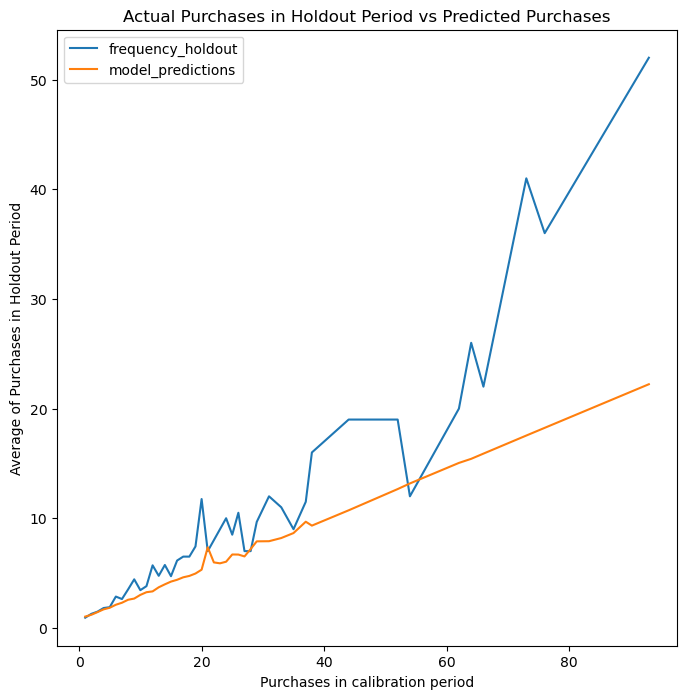

In [21]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
 
plot_calibration_purchases_vs_holdout_purchases(
  model, 
  input_pd, 
  n=90, 
  **{'figsize':(8,8)}
  )
 
display()

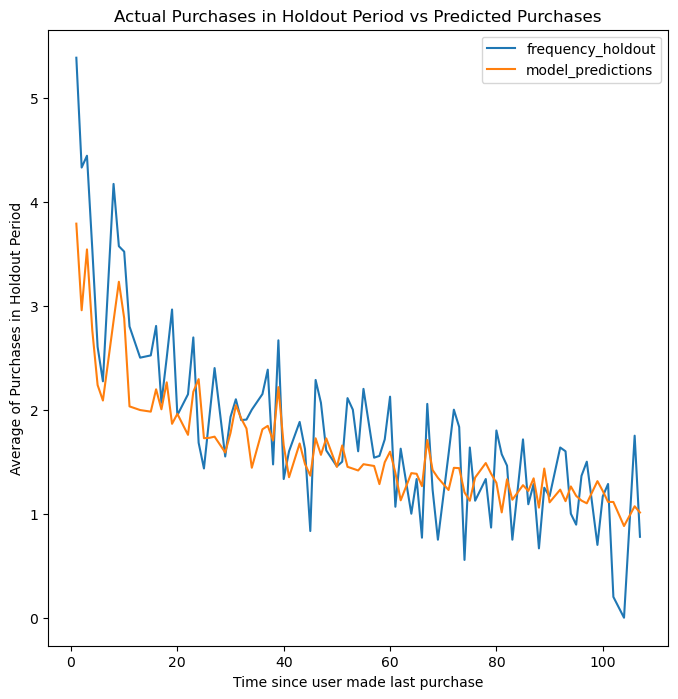

In [22]:
plot_calibration_purchases_vs_holdout_purchases(
  model, 
  input_pd, 
  kind='time_since_last_purchase', 
  n=90, 
  **{'figsize':(8,8)}
  )
 
display()

In [23]:
# add a field with the probability a customer is currently "alive"
filtered_pd['prob_alive']=model.conditional_probability_alive(
    filtered_pd['frequency'], 
    filtered_pd['recency'], 
    filtered_pd['T']
    )
 
filtered_pd.head(10)

C:\Users\Vivek Ketha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,frequency,recency,T,monetary_value,prob_alive
CustomerID,,,,,
12347,6.0,365.0,367.0,599.701667,0.999447
12348,3.0,283.0,358.0,301.480000,0.968069
12352,6.0,260.0,296.0,208.151667,0.985506
12356,2.0,303.0,325.0,269.905000,0.993367
12358,1.0,149.0,150.0,683.200000,0.999727
12359,5.0,324.0,331.0,1139.606000,0.997987
12360,2.0,148.0,200.0,789.240000,0.979260
12362,12.0,292.0,295.0,389.623333,0.999140
12363,1.0,133.0,242.0,252.900000,0.947949


KeyError: 'CustomerID'

<Figure size 640x480 with 0 Axes>

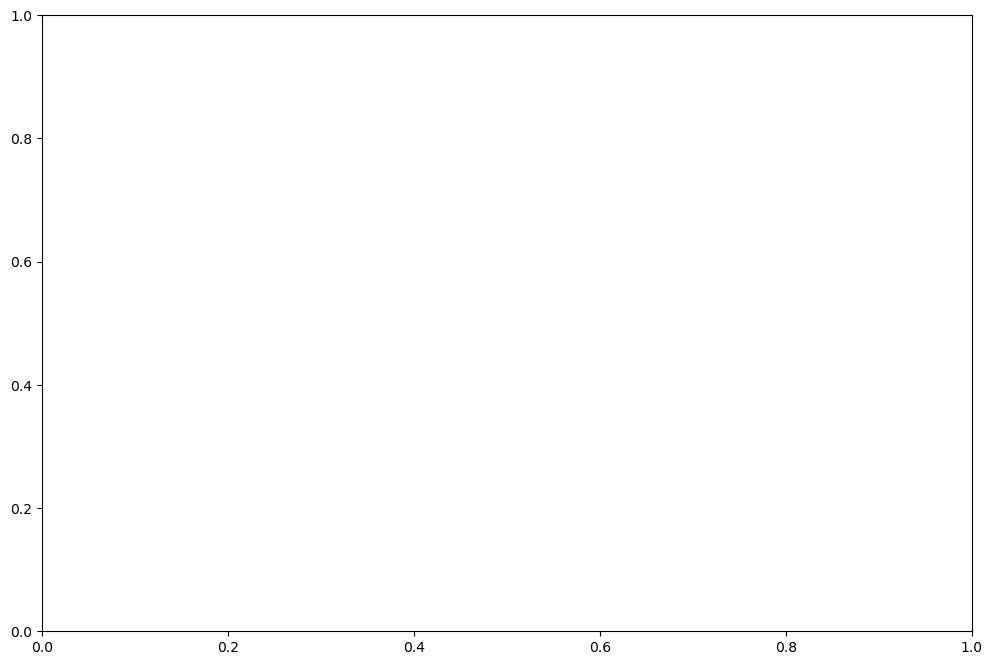

In [24]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt
 
# clear past visualization instructions
plt.clf()
plt.subplots(figsize=(12, 8))
 
# customer of interest
CustomerID = '12347'
 
# grab customer's metrics and transaction history
cmetrics_pd = input_pd[input_pd['CustomerID']==CustomerID]
trans_history = orders_pd.loc[orders_pd['CustomerID'] == CustomerID]
 
# calculate age at end of dataset
days_since_birth = 400
 
# plot history of being "alive"
plot_history_alive(
  model, 
  days_since_birth, 
  trans_history, 
  'InvoiceDate'
  )
 
display()

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix
 
# set figure size
plt.subplots(figsize=(12, 8))
 
plot_probability_alive_matrix(model)
 
display()

In [ ]:
frequency = 6
recency = 255
T = 300
t = 30

print('Probability of Alive: {0}'.format( model.conditional_probability_alive(frequency, recency, T) ))
print('Expected Purchases in next {0} days: {1}'.format(t, model.conditional_expected_number_of_purchases_up_to_time(t, frequency, recency, T) ))